# Importing Data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from numpy import nan


In [2]:
df = pd.read_csv('Adult.csv')

In [3]:
pd.set_option('display.max_rows', 300)

# Set the Stage 

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

We will take a look at the extent to what those factors contribute to ones ability to accumulate wealth. That being said, we have been provided a dataset from the UCI machine learning repository. 

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We see that there's question marks in the data that we are going to need to take care of before we can perform the EDA. 

In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.shape

(48842, 15)

In [8]:
df.value_counts()

age  workclass         fnlwgt  education     educational-num  marital-status      occupation         relationship   race   gender  capital-gain  capital-loss  hours-per-week  native-country  income
21   Private           243368  Preschool     1                Never-married       Farming-fishing    Not-in-family  White  Male    0             0             50              Mexico          <=50K     3
25   Private           308144  Bachelors     13               Never-married       Craft-repair       Not-in-family  White  Male    0             0             40              Mexico          <=50K     3
                       195994  1st-4th       2                Never-married       Priv-house-serv    Not-in-family  White  Female  0             0             40              Guatemala       <=50K     3
30   Private           180317  Assoc-voc     11               Divorced            Machine-op-inspct  Not-in-family  White  Male    0             0             40              United-States   <=

In [9]:
df.duplicated().any()

True

In [10]:
Ismissing = df.isna().any()
print(Ismissing)

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool


In [11]:
df.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Data Cleaning 

We need to replace the ? with nan before we can then replace nan with the mode. 

In [12]:
df = df.replace('?',nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(df)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)


,null,percentage
occupation,280900,5.751
workclass,279900,5.731
native-country,85700,1.755
age,0,0.000
fnlwgt,0,0.000
education,0,0.000
educational-num,0,0.000
marital-status,0,0.000
relationship,0,0.000
race,0,0.000


In [14]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace = True)

In [15]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace = True)

In [16]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)

In [17]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(df)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


As we can see the data is all clean and ready for us to analyze 

# Visualization 

Pairplot 

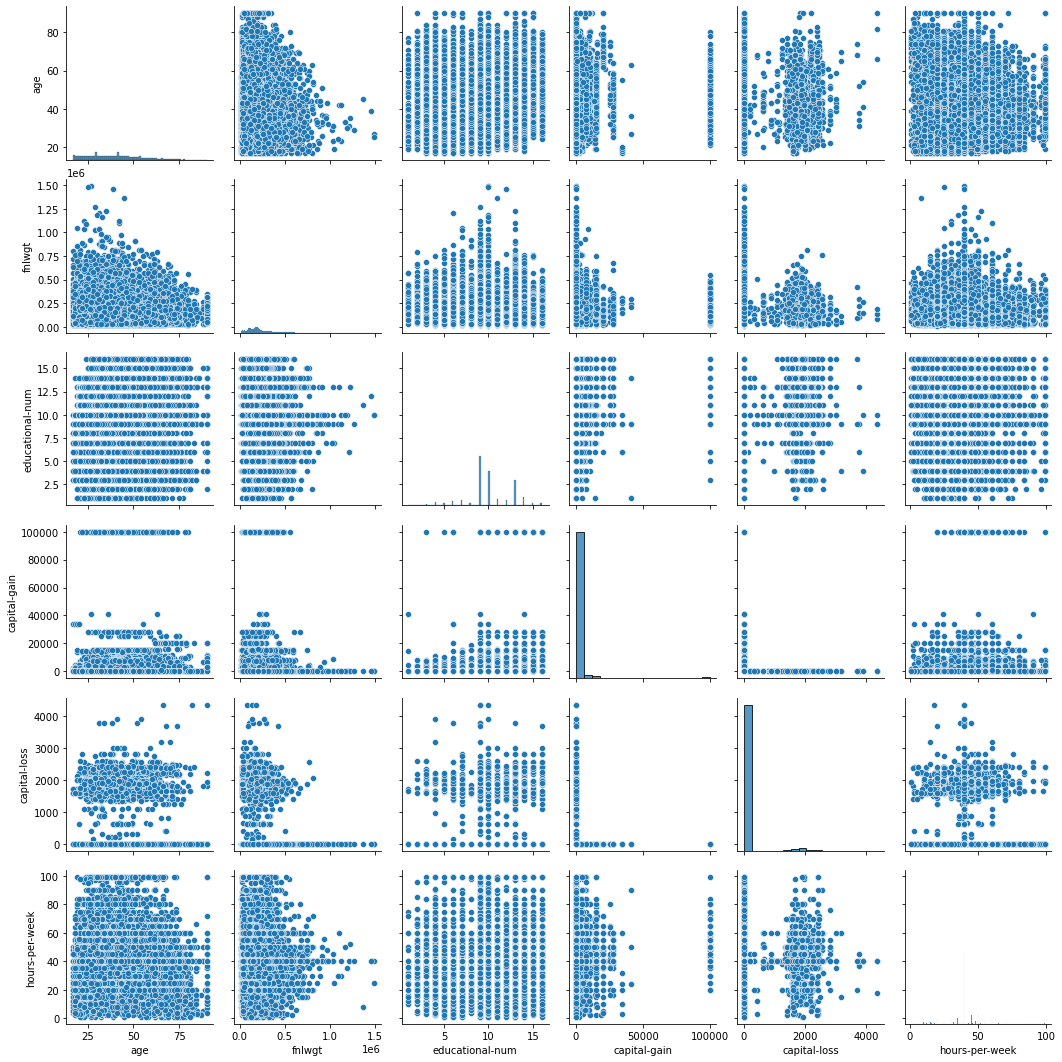

In [18]:
sns.pairplot(df)

age and hours per week are an interesting pair to analyze in addition to capital gain vs hours per week. Very interesting to see how many hours people work to accumulate their wealth. 

# Heatmap 

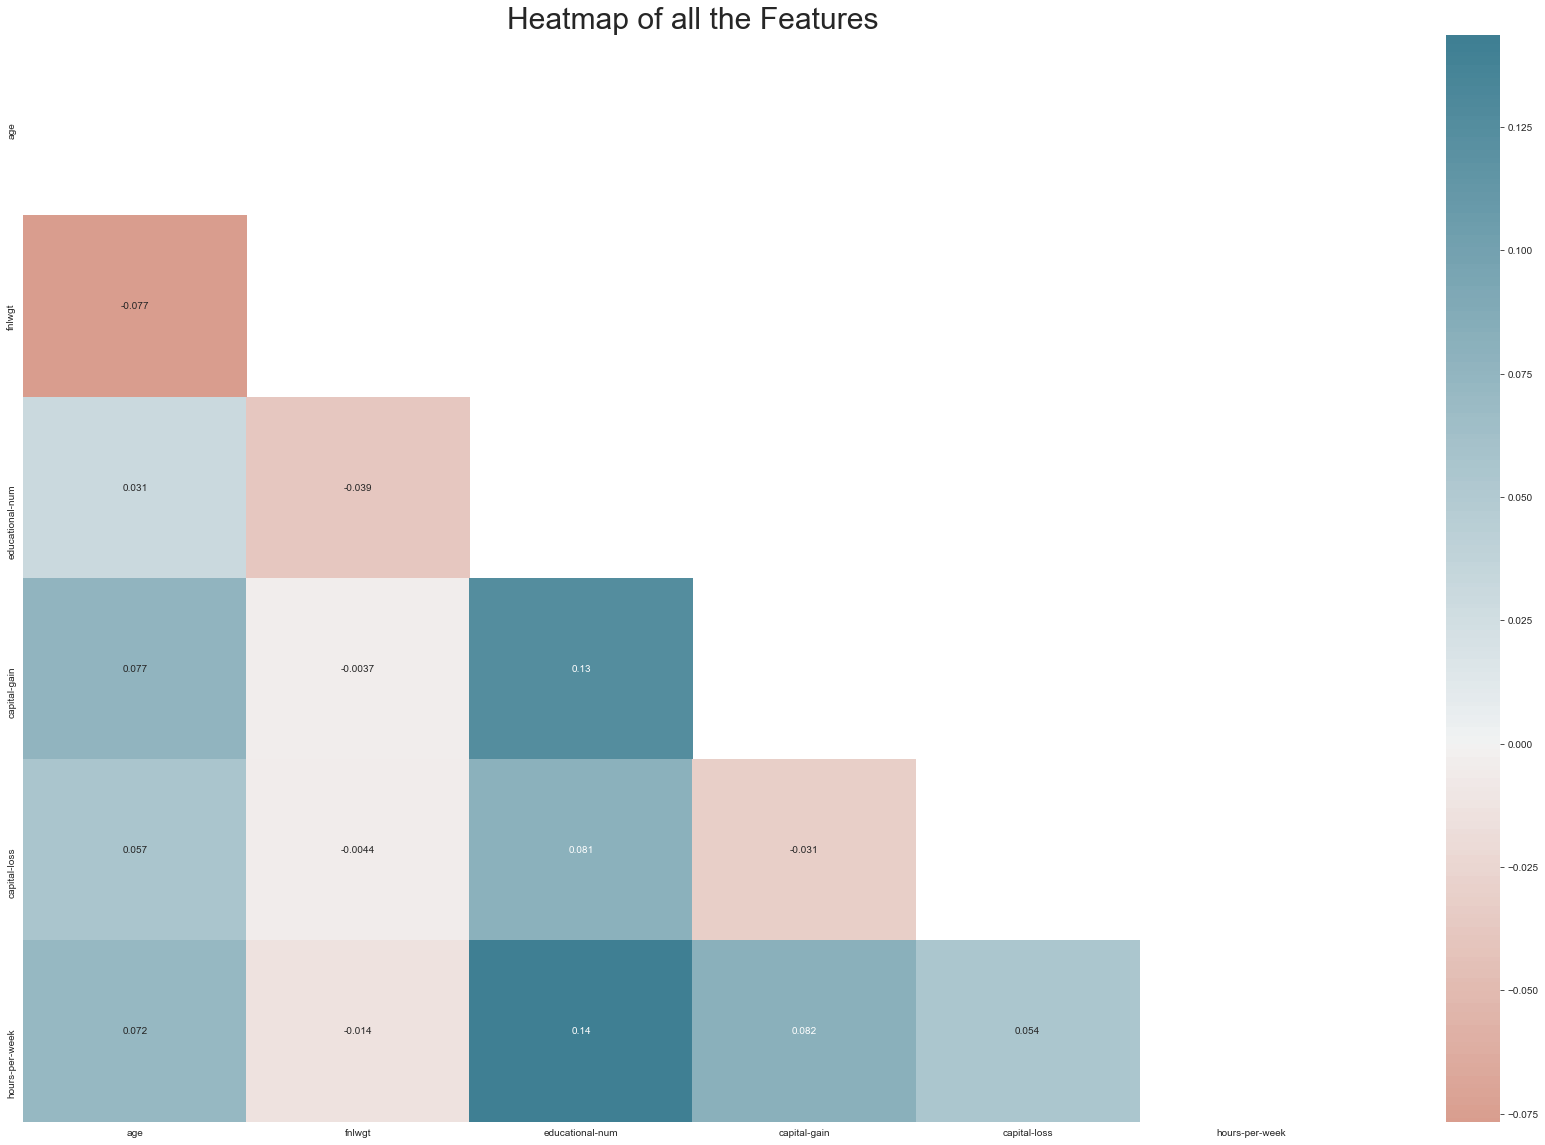

In [19]:

## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

We can see that the correlation between capital-gain & education are highly correlated which is kind of
obvious because the more education one has the more likely they will also earn more 

# Age Distribution 

<function matplotlib.pyplot.show(close=None, block=None)>

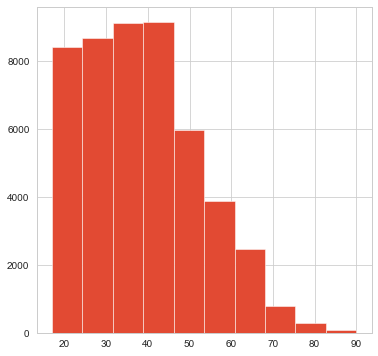

In [57]:
#Lets take a look at age 

df['age'].hist(figsize = (6,6))
plt.show



Here we can see the distribution of humans. We can see that there are more people age 20-50 and then a steep drop off 

age is not symmetric and is right skewed. 

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

# fnlwgt Distribution 

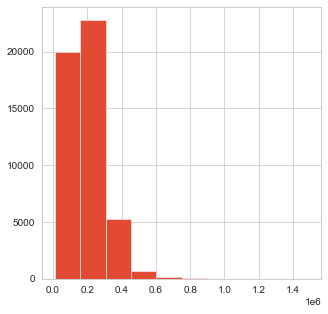

In [22]:
df['fnlwgt'].hist(figsize = (5,5))
plt.show()

# Hours Per Week Distribution 

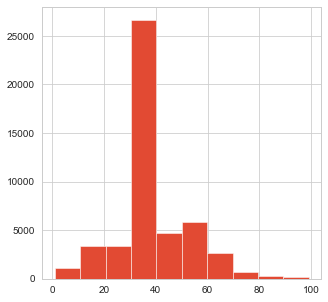

In [23]:
df['hours-per-week'].hist(figsize=(5,5))
plt.show()

The hours per week atrribute varies within the range of 1 to 99. By observation,30-40 hrs people work per week,around 27000 people. There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

# Capital Gain Distribution 

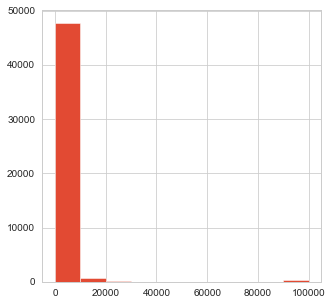

In [24]:
df['capital-gain'].hist(figsize=(5,5))
plt.show()

In [25]:
df['capital-gain'].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

Capital gain shows that either a person has either no gain or a large amount 

# Workforce Distribution 

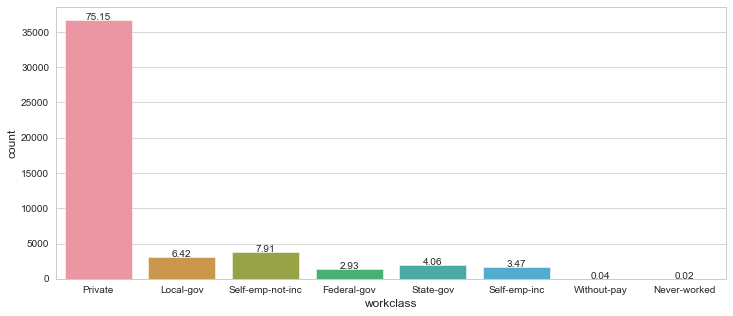

In [26]:
plt.figure(figsize=(12,5))

total = float(len(df['income']))

a = sns.countplot(x='workclass',data=df)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()



Most of the workforce is in the private sector,roughly 3/4 of all people in this dataset. 

# Education Distribution 

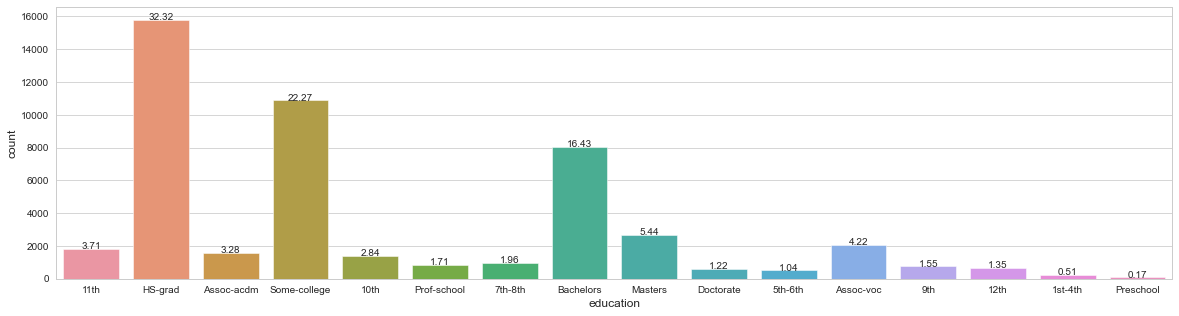

In [27]:
plt.figure(figsize=(20,5))

a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

Hs-grad has 32.32% of all the education attribute. pre-school has min.

# Marriage Status Distribution

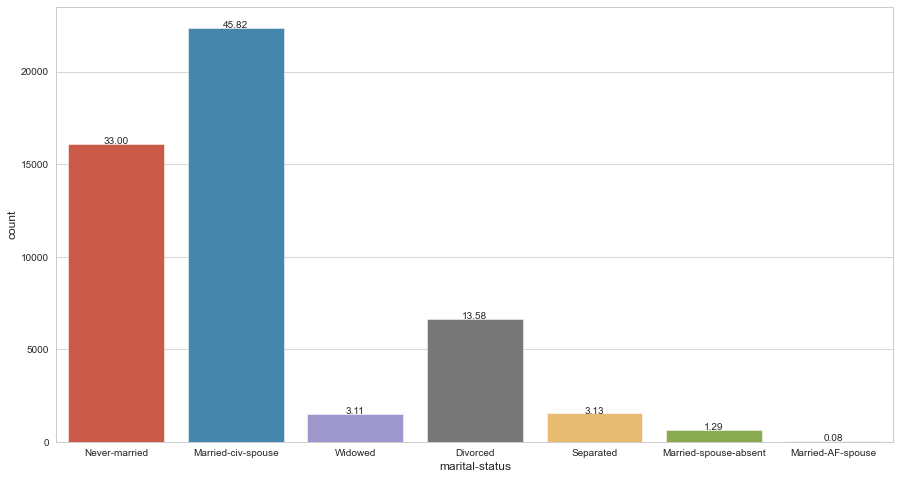

In [28]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital-status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


# Occupation Distribution

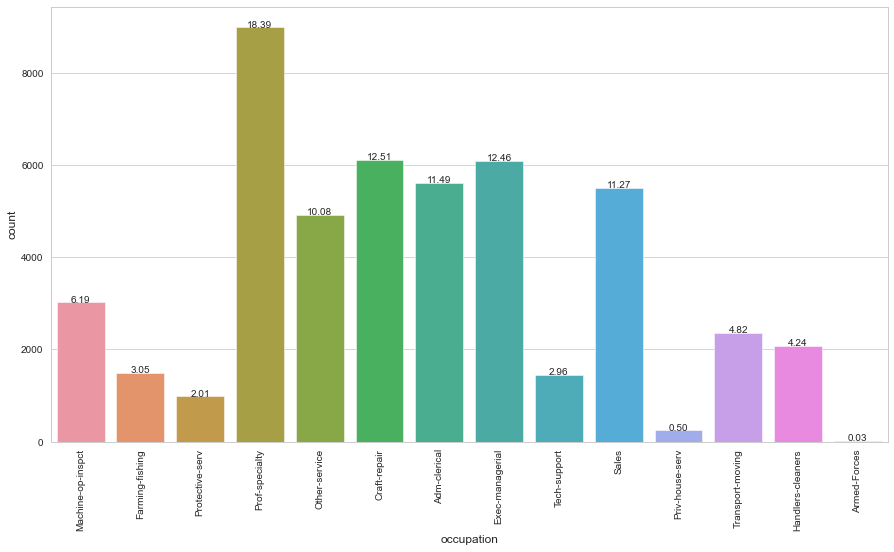

In [29]:


plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df)
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
    
plt.show()



Prof-specialty has the maximum count. Armed-Forces has minimum samples in the occupation attribute.

# Race Distribution

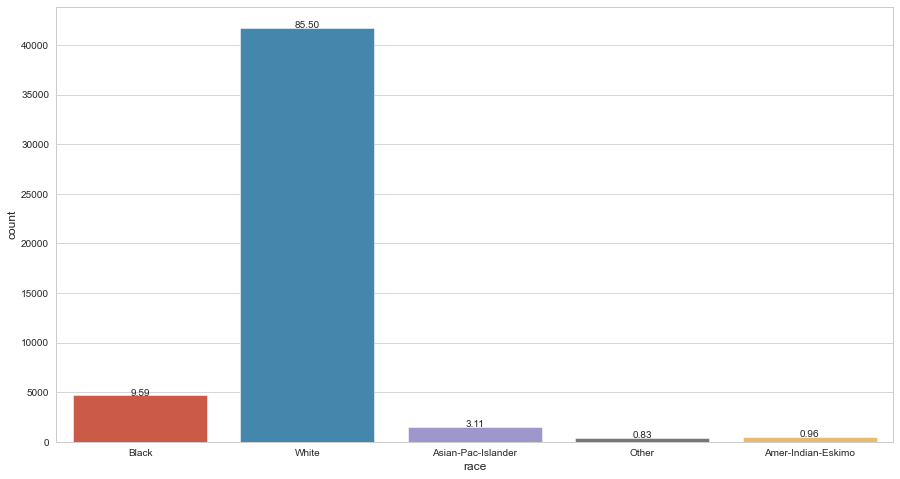

In [30]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


# Income Distribution 

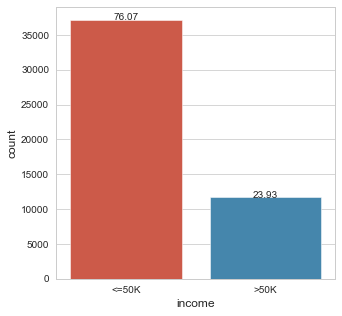

In [31]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

76% percent of people in this graph make less 75k a year while around 23% make over 75k a year. 

<AxesSubplot:xlabel='age', ylabel='Density'>

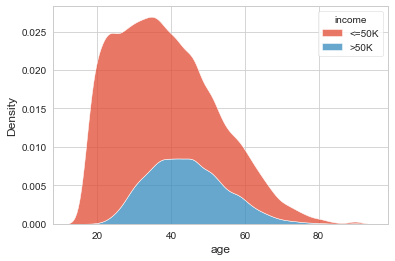

In [58]:
sns.kdeplot(data=df, x="age", hue="income", multiple="stack")

Interesting graph that i found on seaborn's website that can help us get an overall idea of the previous graph. 

# Box plot (Age relationshiop with income)

<function matplotlib.pyplot.show(close=None, block=None)>

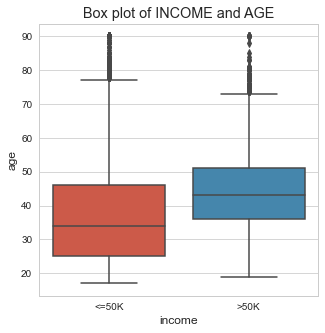

In [32]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of INCOME and AGE')
plt.show


Income group <50k has lower median age(around 34 years) than the income group >50k which has median of (around 42 years)

# Boxplot(workclass relationship with income)

Text(0.5, 1.0, 'workclass vs count')

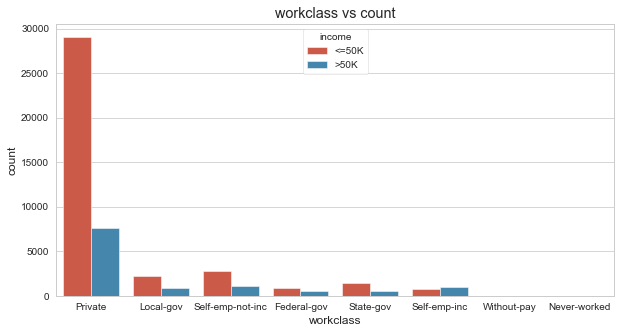

In [33]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=df).set_title("workclass vs count")

The data seems to mainly consist of private employees 

For most relationships there are more people who make less than 50k. However, that relationship is inversed when it comes to self employed people. Which would garner further investigation as to why. 

# Boxplot (Evaluating Relationship with income)

<AxesSubplot:xlabel='relationship', ylabel='count'>

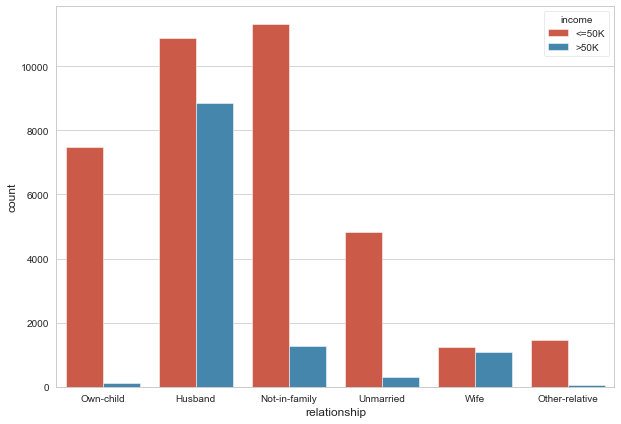

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",data=df)

The relationship between having a family and not having a family is very interesting. Based on this graph, it would lead someone to believe or at least want to investigate why people who have family make more money than people who do not. Maybe one factor is age becasue the older you get the more money you should be making and therefore afford to have a family. 

# Boxplot(Race vs Income)

<Figure size 1440x360 with 0 Axes>

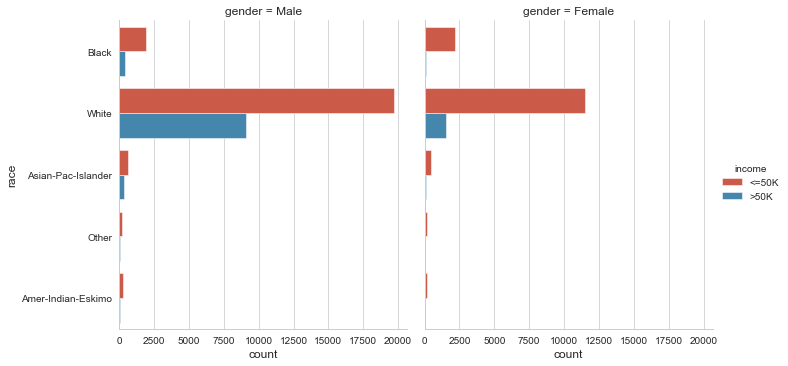

In [35]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df)

Its very clear that the white Gender makes more money than every other race combined

posx and posy should be finite values
posx and posy should be finite values


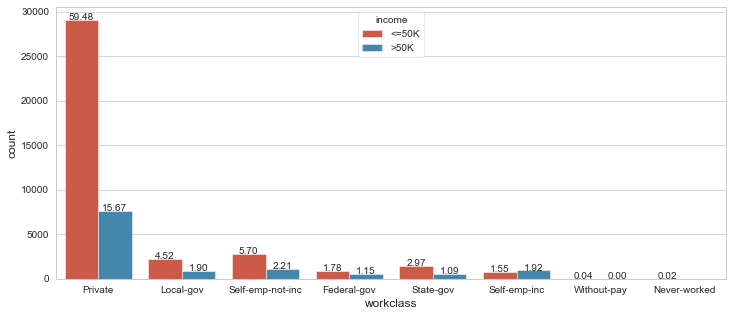

In [36]:
plt.figure(figsize=(12,5))
total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# Catplot(Education vs income)

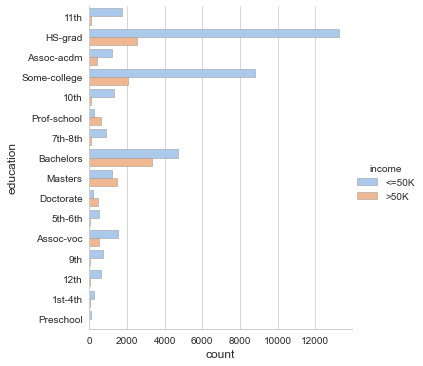

In [37]:
sns.catplot(y="education", hue="income", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);



Data mostly consists of people who's education is high school 

Also, quick to point out that there's more people who make less than 50k that went to college vs making over 50k. Masters and Doctorates show the inverse. 

# Marital status vs income 

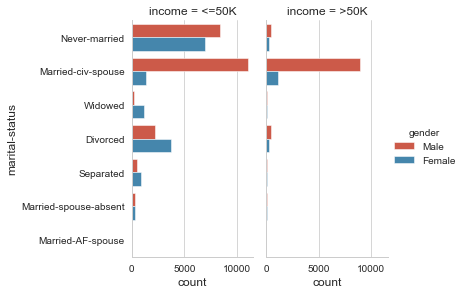

In [38]:
ct = sns.catplot(y='marital-status',hue='gender',col='income',data=df,kind='count',
                height=4,aspect=.7)

# Occupation vs income 

<AxesSubplot:xlabel='count', ylabel='occupation'>

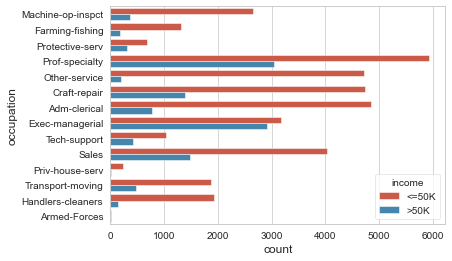

In [39]:
sns.countplot(y="occupation", hue="income",
            data=df)

Exec-managerial and  Prof-specialty would seem to be the most desireable. 

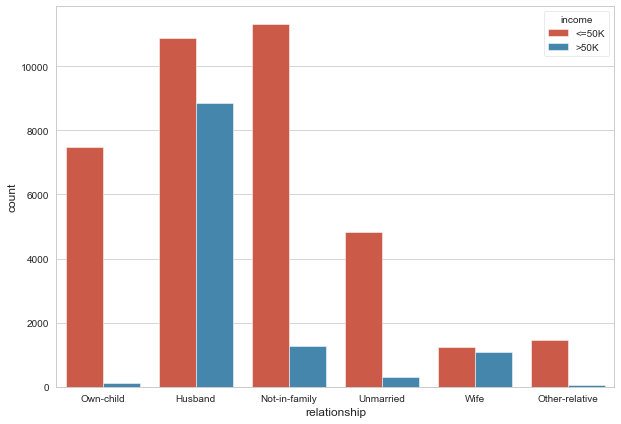

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",
            data=df);

<Figure size 1440x504 with 0 Axes>

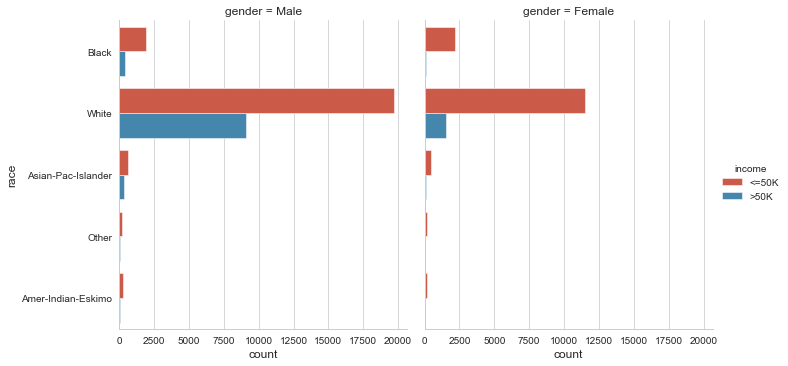

In [41]:
plt.figure(figsize=(20,7))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df)

In conclusion,from the heatmap, we can see the correlation between capital-gain & education are highly correlated because the more education one has the more likely they will accumulate  wealth.

That being said, In the Hours per week distribution, most people work within the 40 hours per week range while some people work up to 70-80 hours per week. 

It was interesting to see that there are more people who make less than 50k. Also,that relationship is inversed when it comes to self employed people, what it means is that although there are much less self employed people, the ones that stay successfull are very successful.

Another insight was how white people made more than all other races combined. 

In addition, Income group that makes <50k has a lower median age(around 34 years) than the income group that makes >50k which has median of (around 42 years). along those lines, we also saw white people generated so much more wealth than all the other races combined. Also, with regards to occupations, the executive-managerial or prof-specialty were great options as they showed highest count of people that made more than 50k 





